#Encuentro Final Machine Learning I

## Integrantes:
   

*   Laura Carolina Mateus Agudelo
*   Daniel Antonio Perez Beltran


   # Desarrollo de un modelo de prediccion de precios de criptomonedas.

Para este desarrollo se recopilo informacion de los datos históricos del precio de Bitcoin desde el anio 2008 hasta el 2024, contenidos en la pagina web Investing.com - https://www.investing.com/crypto/bitcoin/historical-data.

In [1]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset desde un archivo CSV
file_path = 'Bitcoin Historical Data.csv'
df = pd.read_csv(file_path)

In [2]:
print(df.head())

         Date     Price      Open      High       Low     Vol. Change %
0  03/24/2024  67,211.9  64,036.5  67,587.8  63,812.9   65.59K    4.96%
1  03/23/2024  64,037.8  63,785.6  65,972.4  63,074.9   35.11K    0.40%
2  03/22/2024  63,785.5  65,501.5  66,633.3  62,328.3   72.43K   -2.62%
3  03/21/2024  65,503.8  67,860.0  68,161.7  64,616.1   75.26K   -3.46%
4  03/20/2024  67,854.0  62,046.8  68,029.5  60,850.9  133.53K    9.35%


In [3]:
print(df.dtypes)

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object


### Conversiones y limpieza de datos

In [4]:
# Convertir la columna de fecha de object a datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Convertir la columna 'Vol.' a formato numérico
def convert_volume(volume_str):
    if isinstance(volume_str, str):
        if 'K' in volume_str:
            return float(volume_str.replace('K', '')) * 1e3
        elif 'M' in volume_str:
            return float(volume_str.replace('M', '')) * 1e6
        elif 'B' in volume_str:
            return float(volume_str.replace('B', '')) * 1e9
        else:
            return float(volume_str)
    else:
        return volume_str

# Aplicar la función de conversión a la columna 'Vol.'
df['Vol.'] = df['Vol.'].apply(convert_volume)

In [5]:
print(df.dtypes)

Date        datetime64[ns]
Price               object
Open                object
High                object
Low                 object
Vol.               float64
Change %            object
dtype: object


In [6]:
# Limpiar y convertir otras columnas numéricas
if df['Price'].dtype == 'object':
    df['Price'] = df['Price'].str.replace(',', '').astype(float)
if df['Open'].dtype == 'object':
    df['Open'] = df['Open'].str.replace(',', '').astype(float)
if df['High'].dtype == 'object':
    df['High'] = df['High'].str.replace(',', '').astype(float)
if df['Low'].dtype == 'object':
    df['Low'] = df['Low'].str.replace(',', '').astype(float)
if df['Change %'].dtype == 'object':
    df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

# Tratamiento de campos vacios para 'Vol.'
df = df.dropna(subset=['Vol.'])


In [7]:
print(df.head())
print(f'Número de registros: {df.shape[0]}')
print(f'Número de variables: {df.shape[1]}')
print(df.dtypes)

        Date    Price     Open     High      Low      Vol.  Change %
0 2024-03-24  67211.9  64036.5  67587.8  63812.9   65590.0      4.96
1 2024-03-23  64037.8  63785.6  65972.4  63074.9   35110.0      0.40
2 2024-03-22  63785.5  65501.5  66633.3  62328.3   72430.0     -2.62
3 2024-03-21  65503.8  67860.0  68161.7  64616.1   75260.0     -3.46
4 2024-03-20  67854.0  62046.8  68029.5  60850.9  133530.0      9.35
Número de registros: 4993
Número de variables: 7
Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %           float64
dtype: object


In [8]:
# Variables cualitativas y numéricas
cualitativas = df.select_dtypes(include=['object']).columns
numericas = df.select_dtypes(exclude=['object']).columns

print(f'Variables cualitativas: {list(cualitativas)}')
print(f'Variables numéricas: {list(numericas)}')

Variables cualitativas: []
Variables numéricas: ['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']


### Definicion del modelo de entrenamiento

#### Regresion Lineal

In [9]:
# Definir características (X) y (y)
X = df[['Open', 'High', 'Low', 'Vol.', 'Change %']]
y = df['Price']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

In [10]:
# Evaluacion del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 124247.1066982787
R-squared: 0.9995265707198635


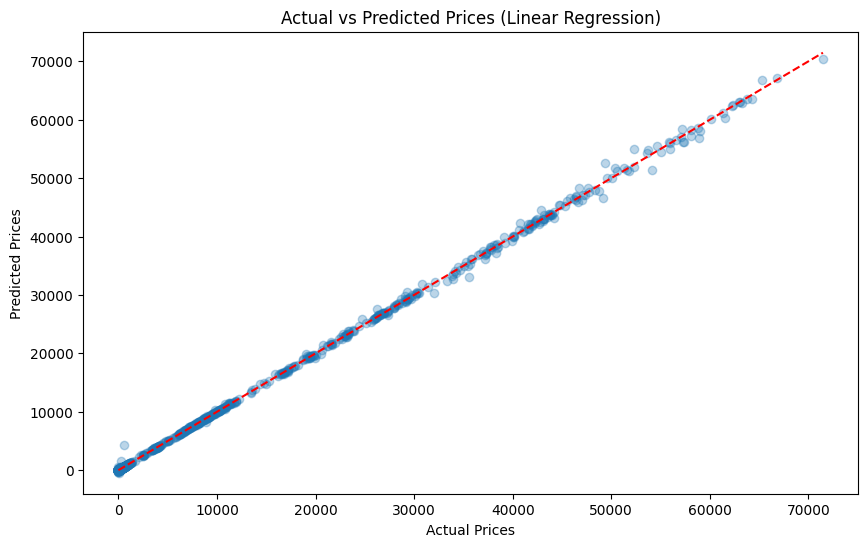

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Línea de referencia
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()

#### Random forest

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar el modelo de regresión de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 86220.68908006322
R-squared: 0.9996714660015128


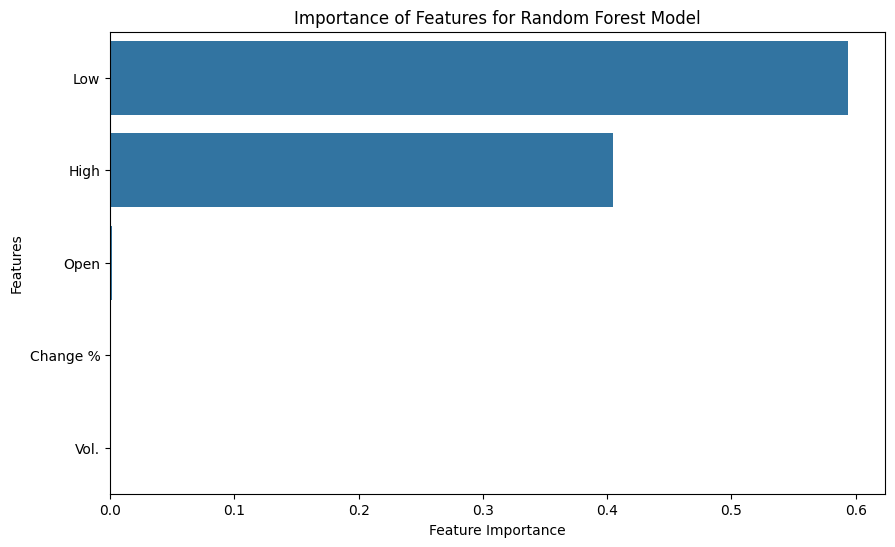

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importancia de características para el modelo Random Forest
importances = model.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Importance of Features for Random Forest Model')
plt.show()

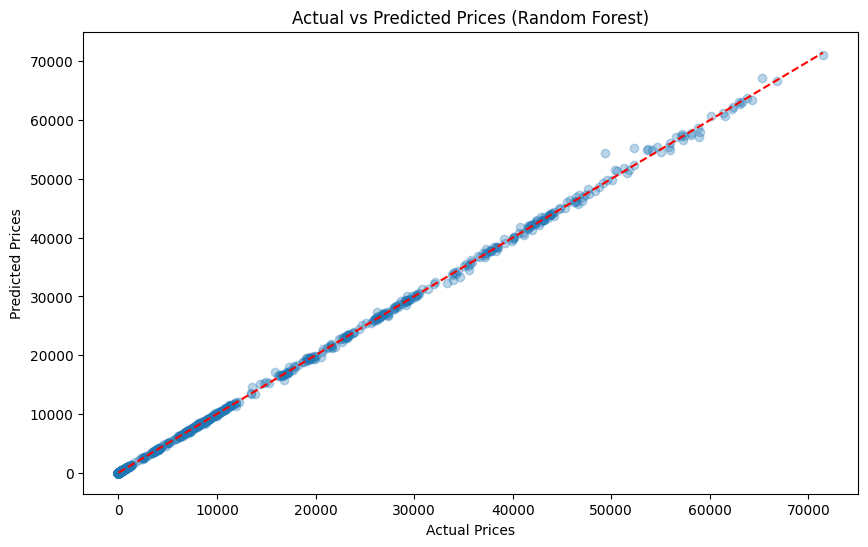

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Línea de referencia
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.show()

## Resultado

El modelo de Random Forest tiene un mejor rendimiento Regresión Lineal para este conjunto de datos porque:

Tiene un Error Cuadratico medio (MSE) más bajo, lo que indica predicciones más precisas y errores de predicción son menores.
Tiene un Coeficiente de Determinacion (R²) más alto, lo que indica que el modelo explica mejor la variabilidad de los datos.

In [ ]:
!jupyter nbconvert --to html /content/MLProyectoFinal/MLEncuentroFinal.ipynb